# Lab 8

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own
* Try and minimize the use of the global namespace (meaning, keep things inside functions)
* Upload your .ipynb file to Gradescope when done
---

This lab introduces you to K-means Clustering

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

There are plenty of RBG-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

For this assignment you are provided a file with RGB triples for a bunch of colors.

The task is to use K-means clustering to:

- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked

In [1]:
## import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# importing sys
import sys

/tmp/ipykernel_95438/2529195273.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Load Data

This color data was taken from a selection of digital ad images where the goal of the project was to understand if the presence of certain colors were indicative of high performing ads.

However, before making a predictive model, it was necessary to actually classify the color of RBG triples that were present in the images.

It is important to note that if the color values were uniformly distributed there would be no value in clustering.


In [2]:
data_file = "HW08_rgb_colors.csv"
df_colors = pd.read_csv(data_file)

## Examine data

If our thesis is correct, similar colors should be near each other in the 3-dimensional RBG space.

To visualize this we can plot the RBG components and verify that this is the case.

Note that in the plot below, the full RGB triple is used to tell pandas/matplotlib what color to make each dot.

In [3]:
# how many data points?
len(df_colors)

2030

In [4]:
# what is in our DataFrame?
df_colors.head()

,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


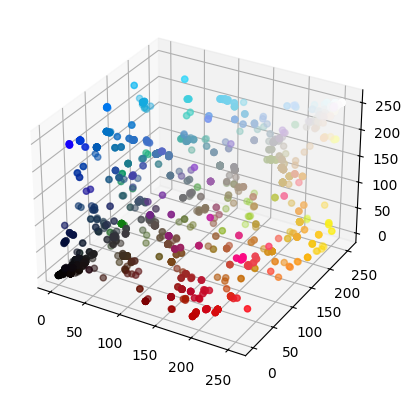

In [5]:
# make a 3d scatter plot
colors = np.array(df_colors.values)/256 # colors need to be (r,b,g) tuple in the range of 0-1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #Note - had to fix this for latest version of matplotlib
ax.scatter(df_colors.red, df_colors.green, df_colors.blue, color=colors )

### Exercise 1: Construct K-means model (20 points)

Fit a KMeans model with 10 clusters.  Be sure to use a fixed `random_state` so that you get consistent results.

Use the `predict` function to get the cluster predictions for each data point and add this to the `df_colors` DataFrame 

##### Student Solution

In [6]:
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

## get np array for RBG values
X = np.array(df_colors.values)


def fit_kmeans(X, n_clusters, random_state):
  ## YOUR CODE HERE ## 
  model = KMeans(n_clusters=n_clusters, random_state=random_state)
  model.fit(X)
  return model

model = fit_kmeans(X, n_clusters, random_state)

## get cluster prediction and add to DataFrame
df_colors['cluster'] = model.predict(X)
df_colors


,red,green,blue,cluster
0,233,197,146,3
1,183,97,58,2
2,188,84,7,6
3,247,252,254,1
4,248,253,253,1
...,...,...,...,...
2025,27,123,141,0
2026,194,193,198,3
2027,41,113,197,0
2028,35,114,197,0


## Visualize results for K-means clustering


### Exercise 2: Plot a histogram of the distribution of clusters (20 points)

Since there are 10 clusters, using the `pandas.DataFrame.hist()` will render the correct distribution of values across each bin since 10 is the default number of bins.

Make sure that your visual output also matches the output of `Series.value_counts()`


##### Student Solution

Cluster: cluster
0    274
1    399
2    140
3    244
4    338
5    119
6    132
7     93
8    118
9    173
Name: count, dtype: int64


array([[<Axes: title={'center': 'cluster'}>]], dtype=object)

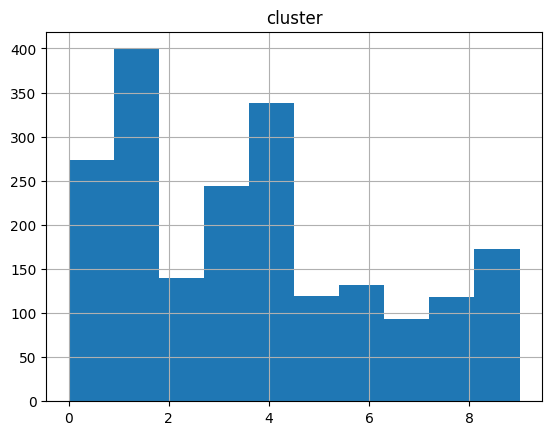

In [7]:
## plot histogram and print out number of points in each color cluster

## YOUR CODE HERE ## 
print("Cluster:", df_colors['cluster'].value_counts().sort_index())
pd.DataFrame.hist(pd.DataFrame(df_colors['cluster']))


### Examine results of clustering

<Axes: xlabel='index', ylabel='cluster'>

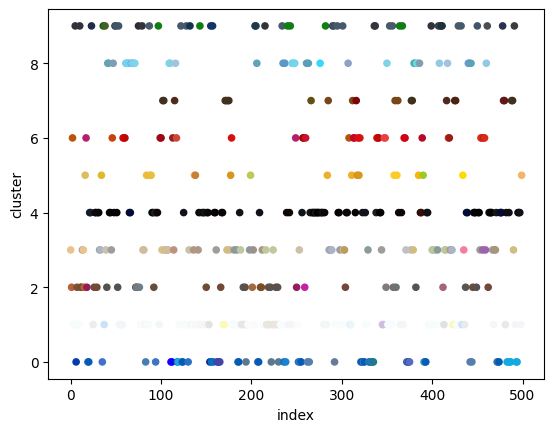

In [8]:
# take a look at distribution of colors - only the first 500 for clarity
df_colors[:500].reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors[:500])

### Exercise 3: Determine the centroids of the clusters (20 points)


##### Student Solution

In [9]:
# get centroids

## YOUR CODE HERE ## 
centroids = model.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['red','green','blue'])
centroids_df['as_list'] = centroids_df.apply(lambda row: row.to_list(), axis=1)
centroids_df

,red,green,blue,as_list
0,33.197080,108.744526,187.416058,"[33.197080291970835, 108.74452554744526, 187.4..."
1,244.112782,246.619048,246.125313,"[244.11278195488734, 246.61904761904762, 246.1..."
2,119.814286,87.735714,85.800000,"[119.81428571428572, 87.7357142857143, 85.8000..."
3,185.159836,176.573770,159.590164,"[185.15983606557376, 176.5737704918033, 159.59..."
4,13.742604,12.257396,16.142012,"[13.74260355029594, 12.257396449704103, 16.142..."
5,224.605042,181.310924,42.067227,"[224.6050420168067, 181.3109243697479, 42.0672..."
6,198.492424,28.280303,36.939394,"[198.4924242424242, 28.280303030303017, 36.939..."
7,83.000000,46.838710,25.978495,"[83.0, 46.83870967741936, 25.97849462365592]"
8,109.542373,192.313559,215.144068,"[109.54237288135593, 192.31355932203388, 215.1..."
9,42.156069,80.306358,68.861272,"[42.15606936416182, 80.30635838150289, 68.8612..."


Next, let's ``create a color dictionary`` to give color names to each centroid. You will need this dictionary to solve Exercise 4.

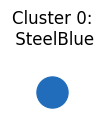

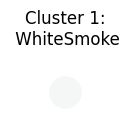

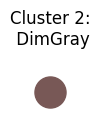

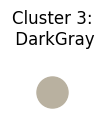

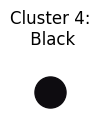

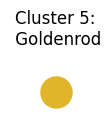

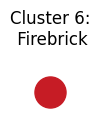

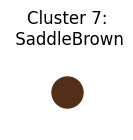

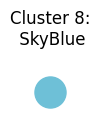

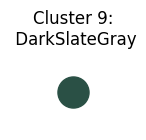

In [10]:
import HW08_color_names  #this is a dictionary
color_dict = HW08_color_names.get_closest_name_for_rgb(centroids)

def show_color(test_color, title):
  # normalize 
  c = [ cc/255 for cc in test_color]  

  # some random coordinates
  x=[1]
  y = [1]

  # plot a single dot
  fig = plt.figure(figsize=(1, 1))
  plt.scatter(x,y,color=c,s=500)
  plt.title(title)
  plt.axis('off')
  return(plt)

for cluster in range(n_clusters):
    show_color(centroids[cluster], f'Cluster {cluster}:\n {color_dict[cluster]}')


### Exercise 4: Write a function that makes the best guess of an RGB triple based on the centroids (20 points)

The  [`KMeans.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function predicts the cluster of any test data point by returning the cluster whose center is closest to the test data point.

Without using `predict()` write a function that guesses the color of an RBG triple by finding the nearest centroid.

There are many ways to calculate distance.  For this exercise it is sufficient to use a simple Euclidean distance formula.


In [11]:
## your color guessing function
def guess_color(centroids, color_dict, test_color):

  ## YOUR CODE HERE ##
  from scipy.spatial import distance
  centroids_df['distance'] = centroids_df['as_list'].apply(lambda x: distance.euclidean(x, test_color))
  closest = centroids['distance'].idxmin()
  color_name = color_dict[closest]
  return color_name

color1 = [200, 5, 5]  # approximately red 
print(guess_color(centroids=centroids_df, color_dict=color_dict, test_color=color1))

Firebrick


### Exercise 5: Write a function that returns the colors name based on the `predict()` function (20 points)


##### Student Solution

In [12]:
def predict_color(model, color_dict, test_color):

    ## YOUR CODE HERE ## 
    predicted = model.predict(np.array([test_color]))
    color_name = color_dict[predicted[0]]
    return color_name

color1 = [200, 5, 5] # approximately red 
print(predict_color(model=model, color_dict=color_dict, test_color=color1))

Firebrick
